# Урок 4. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, confusion_matrix, recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [139]:
df = pd.read_csv('train_preprocessed.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

Воспроизвожу результаты предыдущей работы

In [140]:
X = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=17)

In [141]:
schemes = dict(
    knn = KNeighborsClassifier(n_neighbors=5),
    gsnb = GaussianNB(),
    dtc = DecisionTreeClassifier(random_state=17),
    logreg = LogisticRegression(random_state=17),
)

models = dict()

for scheme_name, scheme in schemes.items():
  models[scheme_name] = scheme.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
predictions = dict()

for model_name, model in models.items():
  predictions[model_name] = model.predict(x_test)

In [143]:
def my_recall_score(y_true, y_pred, get_matrix=False):
  cm = confusion_matrix(y_true, y_pred)
  (tn, fp), (fn, tp) = cm

  if get_matrix:
    return tp / (tp + fn), cm
  else:
    return tp / (tp + fn)

recall_scores = dict()
confusion_matrixes = dict()

for prediction_model_name, prediction in predictions.items():
  my_rs, cm = my_recall_score(y_test, prediction, get_matrix=True)
  rs = recall_score(y_test, prediction)

  recall_scores[prediction_model_name] = rs
  confusion_matrixes[prediction_model_name] = cm

  print(f'Для {prediction_model_name}')
  print('rs == my_rs ?', rs == my_rs)
  print('rs =', rs)
  print('Матрица ошибок:\n', cm)
  print()

Для knn
rs == my_rs ? True
rs = 0.4774774774774775
Матрица ошибок:
 [[128  28]
 [ 58  53]]

Для gsnb
rs == my_rs ? True
rs = 0.7657657657657657
Матрица ошибок:
 [[132  24]
 [ 26  85]]

Для dtc
rs == my_rs ? True
rs = 0.7027027027027027
Матрица ошибок:
 [[129  27]
 [ 33  78]]

Для logreg
rs == my_rs ? True
rs = 0.7477477477477478
Матрица ошибок:
 [[136  20]
 [ 28  83]]



In [144]:
min_recall_model_name = min(recall_scores, key=recall_scores.get)
min_recall_model = models[min_recall_model_name]
print(min_recall_model_name, 'recall:', recall_scores[min_recall_model_name])

knn recall: 0.4774774774774775


In [145]:
min_recall_model_precision = precision_score(y_test, predictions[min_recall_model_name])
print(min_recall_model_name, 'precision:', min_recall_model_precision)

knn precision: 0.654320987654321


In [146]:
beta = 1
recall = recall_scores[min_recall_model_name]
precision = min_recall_model_precision
my_f1_score = F1 = 2 * (precision * recall) / (beta**2 * precision + recall)

print(min_recall_model_name, 'my f1-score:', my_f1_score)

knn my f1-score: 0.5520833333333334


In [147]:
min_recall_model_f1 = f1_score(y_test, predictions[min_recall_model_name])
print(min_recall_model_name, 'f1-score:', min_recall_model_f1)

knn f1-score: 0.5520833333333334


В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [148]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [149]:
precision_recall_fscore_support_all = dict()
classification_report_all = dict()

for prediction_model_name, prediction in predictions.items():
  prfs = precision_recall_fscore_support(y_test, prediction)
  cf = classification_report(y_test, prediction)

  precision_recall_fscore_support_all[prediction_model_name] = prfs
  classification_report_all[prediction_model_name] = cf

  print('Model:', prediction_model_name)
  print(cf, '\n\n')

Model: knn
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       156
           1       0.65      0.48      0.55       111

    accuracy                           0.68       267
   macro avg       0.67      0.65      0.65       267
weighted avg       0.67      0.68      0.67       267
 


Model: gsnb
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       156
           1       0.78      0.77      0.77       111

    accuracy                           0.81       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.81      0.81      0.81       267
 


Model: dtc
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       156
           1       0.74      0.70      0.72       111

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.77       267
weighted avg       0.77      0.78 

In [150]:
precision_recall_fscore_support_all

{'knn': (array([0.68817204, 0.65432099]),
  array([0.82051282, 0.47747748]),
  array([0.74853801, 0.55208333]),
  array([156, 111])),
 'gsnb': (array([0.83544304, 0.77981651]),
  array([0.84615385, 0.76576577]),
  array([0.84076433, 0.77272727]),
  array([156, 111])),
 'dtc': (array([0.7962963 , 0.74285714]),
  array([0.82692308, 0.7027027 ]),
  array([0.81132075, 0.72222222]),
  array([156, 111])),
 'logreg': (array([0.82926829, 0.80582524]),
  array([0.87179487, 0.74774775]),
  array([0.85      , 0.77570093]),
  array([156, 111]))}

Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [151]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [152]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
skf_split = skf.split(X, y)

In [153]:
rgl_koef_vals = np.logspace(-1, 2, num=500)

In [154]:
clf = LogisticRegressionCV(
    Cs=rgl_koef_vals, 
    cv=skf_split, 
    random_state=17,
    scoring="roc_auc"
).fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [155]:
import matplotlib.pyplot as plt

In [156]:
mean_scores = clf.scores_[1].mean(axis=0)

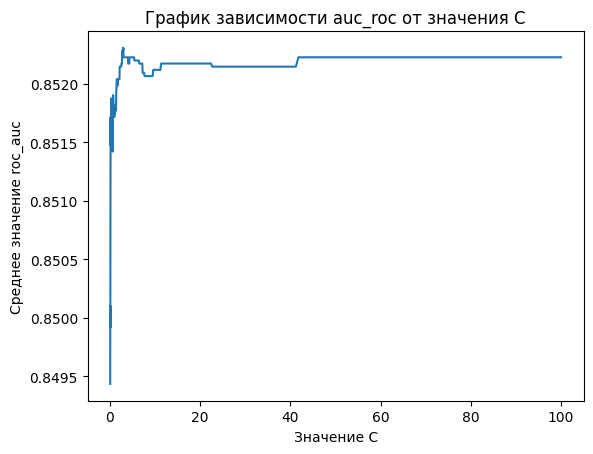

In [157]:
plt.plot(rgl_koef_vals, mean_scores)
plt.xlabel('Значение С')
plt.ylabel('Среднее значение roc_auc')
plt.title('График зависимости auc_roc от значения C');

### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

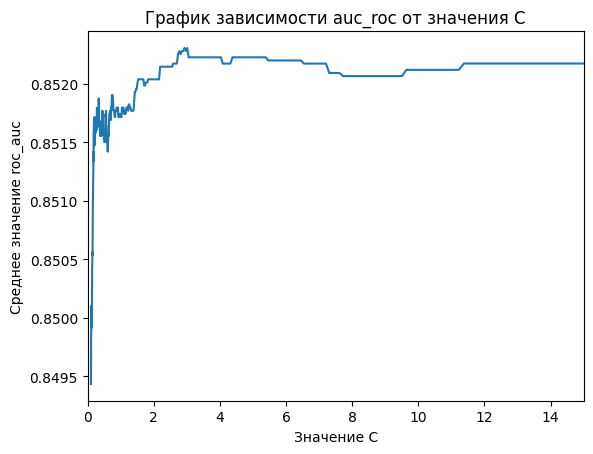

In [158]:
plt.plot(rgl_koef_vals, mean_scores)
plt.xlim(0, 15)
plt.xlabel('Значение С')
plt.ylabel('Среднее значение roc_auc')
plt.title('График зависимости auc_roc от значения C');

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [159]:
from sklearn.metrics import roc_auc_score, roc_curve

In [160]:
# probas = logit_search.fit(x_train, y_train).predict_proba(x_train)
# fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
# auc = roc_auc_score(y_train, probas[:, 1])
# plt.plot(fpr, tpr, label="auc=" + str(auc))
# plt.legend(loc=4)

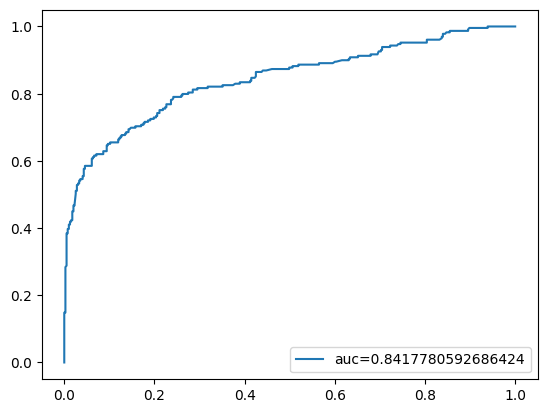

In [161]:
probas = clf.predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)